# Van Der Pol Oscillator

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from typing import List

## Van Der Pol oscillator - stable

In [2]:
def vanDerPol(t, x):
    return [x[1], -x[0] - (x[0]**2 - 1)*x[1]]

In [3]:
def solve_diffeq(func, t, tspan, ic, parameters={}, algorithm='DOP853', stepsize=np.inf):
    return solve_ivp(fun=func, t_span=tspan, t_eval=t, y0=ic, method=algorithm, 
                     args=tuple(parameters.values()), atol=1e-8, rtol=1e-5, max_step=stepsize)

def phasePlane(x1, x2, func):
    X1, X2 = np.meshgrid(x1, x2)  # create grid
    u, v = np.zeros(X1.shape), np.zeros(X2.shape)
    NI, NJ = X1.shape
    for i in range(NI):
        for j in range(NJ):
            x = X1[i, j]
            y = X2[i, j]
            dx = func(0, (x, y))  # compute values on grid
            u[i, j] = dx[0]
            v[i, j] = dx[1]
    M = np.hypot(u, v)
    u /= M
    v /= M
    return X1, X2, u, v, M

In [15]:
def DEplot(sys: object, tspan: tuple, x0: List[List[float]], 
           x: np.ndarray, y: np.ndarray):
    if len(tspan) != 3:
        raise Exception('tspan should be tuple of size 3: (min, max, number of points).')
    # Set up the figure the way we want it to look
    plt.figure(figsize=(12, 9))

    X1, X2, dx1, dx2, M = phasePlane(
        x, y, sys
    )

    # Quiver plot
    plt.quiver(X1, X2, dx1, dx2, M, scale=None, pivot='mid')
    plt.grid()
    
    t1 = np.linspace(0, tspan[0], tspan[2])
    t2 = np.linspace(0, tspan[1], tspan[2])
    if min(tspan) < 0:
        t_span1 = (np.max(t1), np.min(t1))
    else:
        t_span1 = (np.min(t1), np.max(t1))
    t_span2 = (np.min(t2), np.max(t2))
    for x0i in x0:
        sol1 = solve_diffeq(sys, t1, t_span1, x0i)
        plt.plot(sol1.y[0, :], sol1.y[1, :], '-r')
        sol2 = solve_diffeq(sys, t2, t_span2, x0i)
        plt.plot(sol2.y[0, :], sol2.y[1, :], '-r')

    plt.xlim([np.min(x), np.max(x)])
    plt.ylim([np.min(y), np.max(y)])
    plt.show()

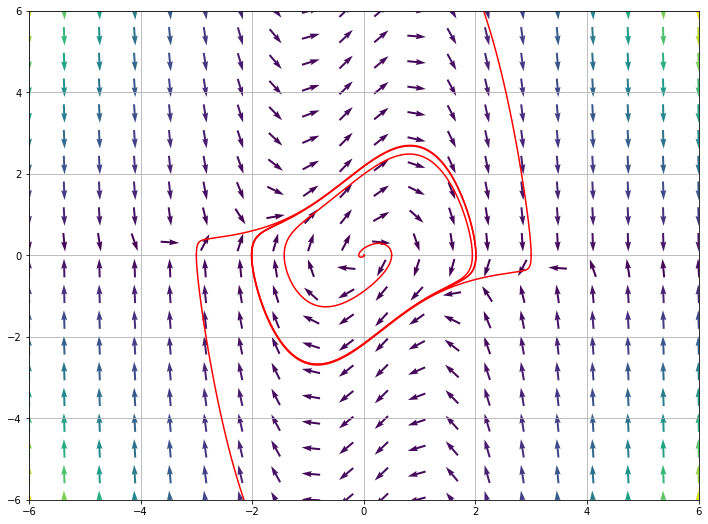

In [16]:
x0 = [
    [0.5, 0],
    [3.0, 0],
    [-3, 0]
]

x1 = np.linspace(-6, 6, 20)
x2 = np.linspace(-6, 6, 20)

DEplot(vanDerPol, (-10, 10, 1000), x0, x1, x2)

## Van Der Pol oscillator - made to be unstable change of sign

In [17]:
def vanDerPol_US(t, x):
    return [x[1], -x[0] + (x[0]**2 - 1)*x[1]]

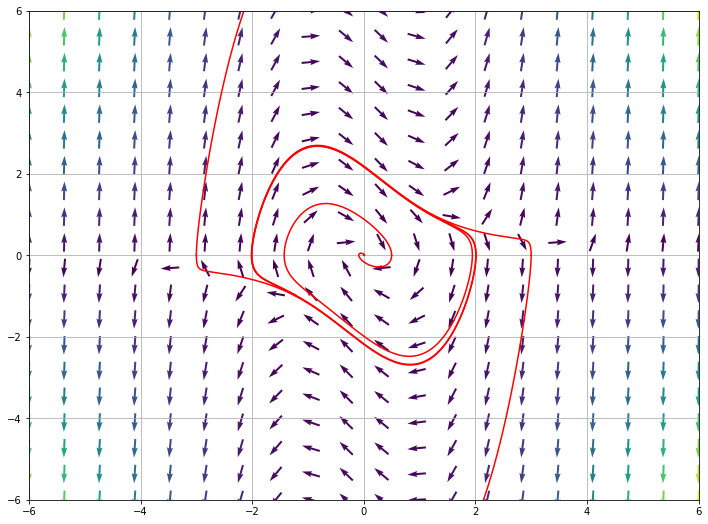

In [18]:
DEplot(vanDerPol_US, (-10, 10, 1000), x0, x1, x2)